# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *P*

**Names:**

* *Matthias Leroy*
* *Pierre Fouche*
* *Alexandre Poussard*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
import epidemics_helper
from networkx.readwrite import json_graph
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from random import sample

#Load the graph
filename = '../data/nyc_augmented_network.json'
json_load = json.load(open(filename))
G = json_graph.node_link_graph(json_load)
nbrNodes = nx.number_of_nodes(G)

#Launch the epidemic
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 107.15 days | 107.15 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [2]:
#Function that plot the evolution of the epidemic over time
def plotStatus(graph,epidemic):
    nbOfNodes = nx.number_of_nodes(graph)
    susTime = []
    infTime = []
    recTime = []
    timeInf60 = 0
    timeRec60 = 0
    
    #Every day of the epidemic
    for i in range(0,101):
        countSus = 0
        countInf = 0
        countRec = 0
        #Every nodes of the graph
        for j in range(nbOfNodes):
            #look if the node is infected at a given day(we consider that a recovered node is no longer infected)
            if epidemic.inf_time[j] <= i and epidemic.rec_time[j] >= i:
                countInf += 1
            #look if the node is susceptible at a given day
            elif epidemic.inf_time[j] > i:
                countSus += 1
            #look if the node is recovered at a given day
            elif epidemic.rec_time[j] <= i:
                countRec += 1
                
        #Find the percentage of susceptible, infected and recovered people at a given time
        percInf = (countInf*100)/nbOfNodes
        percSus = (countSus*100)/nbOfNodes
        percRec = (countRec*100)/nbOfNodes
        infTime.append(percInf)
        susTime.append(percSus)
        recTime.append(percRec)
        
        #Find the time it takes before 60% of the population is infected and dead
        if percInf >= 60 and timeInf60 == 0:
            timeInf60 = i
        #We consider that every recovered node are dead because we can not make the difference with a healed one
        elif percRec >= 60 and timeRec60 == 0:
            timeRec60 = i
        
    #We plot the different percentages
    plt.plot(infTime)
    plt.plot(susTime)
    plt.plot(recTime)
    plt.title("Percetage of susceptible, infected and recovered nodes over time", fontsize=10)
    plt.xlabel("Time (in day)", fontsize=15)
    plt.ylabel("Percentage of nodes", fontsize=15)
    plt.legend(["Infected", "Susceptible", "Recovered"], loc='lower right', fontsize=14)
    plt.show()

    print("at the day", timeInf60, ", 60% of the population is infected")
    print("at the day", timeRec60, ", 60% of the population is recovered")


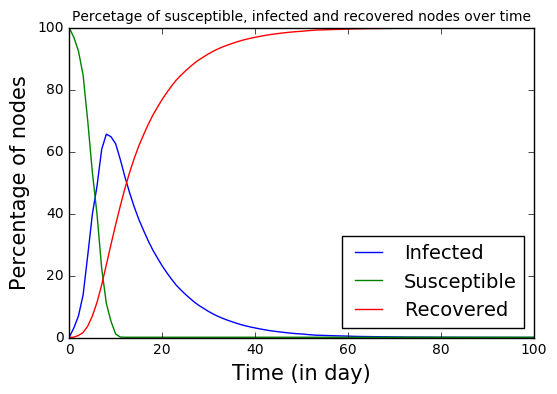

at the day 7 , 60% of the population is infected
at the day 15 , 60% of the population is recovered


In [3]:
plotStatus(G,sir)

3) It takes 7 day before 60% of the population is infected and 15 days before 60% is recovered

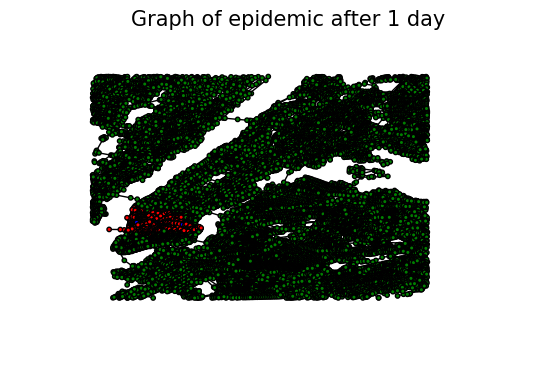

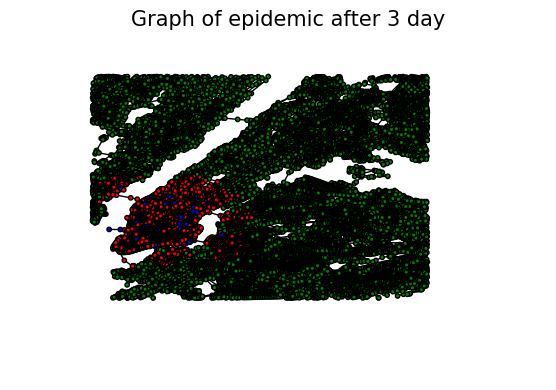

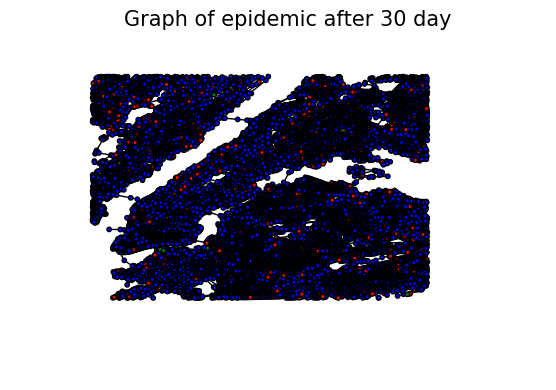

Green nodes: Susceptible, Red nodes: Infected, Blue nodes: Recovered


In [4]:
#Create a list of color to draw the graph in function of the time
def colorNodes(time, nbOfNodes):
    color = []
    #Check the state of the node and choose the color
    for i in range(nbOfNodes):
        if sir.inf_time[i] <= time and sir.rec_time[i] > time:
            color.append('r')
        elif sir.rec_time[i] <= time:
            color.append('b')
        elif sir.inf_time[i] > time:
            color.append('g')
    return color

coordinatesDic = {}
colorAt1 = colorNodes(1, nx.number_of_nodes(G))
colorAt3 = colorNodes(3, nx.number_of_nodes(G))
colorAt30 = colorNodes(30, nx.number_of_nodes(G))

#Create a dictionary of coordinates to draw the graph
for i in json_load["nodes"]:
    coordinatesDic[i["id"]] = (i["coordinates"][0],i["coordinates"][1])

plt.axis('off');
nx.draw_networkx(G, coordinatesDic, with_labels=False, node_size=10, node_color=colorAt1)
plt.title("Graph of epidemic after 1 day", fontsize=15)
plt.show()
plt.axis('off');
nx.draw_networkx(G, coordinatesDic, with_labels=False, node_size=10, node_color=colorAt3)
plt.title("Graph of epidemic after 3 day", fontsize=15)
plt.show()
plt.axis('off');
nx.draw_networkx(G, coordinatesDic, with_labels=False, node_size=10, node_color=colorAt30)
plt.title("Graph of epidemic after 30 day", fontsize=15)
plt.show()
print("Green nodes: Susceptible, Red nodes: Infected, Blue nodes: Recovered")

After one day, everybody in the zone around the source is infected but it is a small portion of the city.
After three days, the epidemic start to spread in the city and people around the source start to recover.
After thirty days, almost the entire city has recovered.

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [5]:
#Create and launch random epidemic
def randomEpidemics(nbrEdges):
    
    graph2 = json_graph.node_link_graph(json_load)
    
    #Remove random edges
    edges = sample(graph2.edges(),nbrEdges)
    graph2.remove_edges_from(edges)

    startingNode = np.random.randint(0,nx.number_of_nodes(graph2))
    sir = epidemics_helper.SimulationSIR(graph2, beta=10.0, gamma=0.1)
    sir.launch_epidemic(source=startingNode, max_time=100.0);
    nbrSuc = 0
    nbrInf = 0
    nbrRec = 0
    for i in range(nx.number_of_nodes(graph2)):
        if sir.inf_time[i] <= 30 and sir.rec_time[i] > 30:
            nbrInf +=1
        elif sir.inf_time[i] > 30:
            nbrSuc +=1
        elif sir.rec_time[i] <= 30:
            nbrRec +=1
   
    return (nbrSuc,nbrInf,nbrRec)

#Compute the average number of suceptible, infected and recovered
def computeAverage(nbrEdges):
    averageSuc = 0
    averageInf = 0
    averageRec = 0
    for i in range(5):
        r1 = randomEpidemics(nbrEdges)
        averageSuc += r1[0]
        averageInf += r1[1]
        averageRec += r1[2]
    return (averageSuc/5,averageInf/5,averageRec/5)
    

In [6]:
average1 = computeAverage(1000)
average2 = computeAverage(10000)
print("With 1000 edges removed, at time 30, the average of persons suceptible is ",average1[0],", of persons infected is ",average1[1],", of persons dead is ",average1[2])
print("With 10000 edges removed, at time 30, the average of persons suceptible is ",average2[0],", of persons infected is ",average2[1],", of persons dead is ",average2[2])     

Epidemic stopped after 100.15 days | 100.15 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 103.11 days | 103.11 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 105.10 days | 105.10 days elapsed | 0.3% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 100.22 days | 100.22 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.18 days | 100.18 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 101.74 days | 101.74 days elapsed | 11.9% susceptible, 0.0% infected, 88.1% recovered
Epidemic stopped after 100.47 days | 100.47 days elapsed | 12.4% susceptible, 0.0% infected, 87.6% recovered
Epidemic stopped after 102.96 days | 102.96 days elapsed | 24.3% susceptible, 0.0% infected, 75.7% recovered
Epidemic stopped after 103.75 days | 103.75 days elapsed | 24.0% susceptible, 0.0% infected, 76.0% recovered
Epidemic stopped after 1

This strategy is not effective, we can see that after 30 days only 115 persons, in average, are still healthy, 2991.4 are infected and 23374.6 dead. So almost everyone is dead.
<br/>If we increase the budget, the stategy is a little more effective. 5221.4 persons are healthy, 4312.6 are infected and there are still 16947 persons dead

#### Exercise 2.11: Strategy 2

Instead of removing edges at random, we decide te remove one edge of 2500 nodes of degree 2. 
In fact after observing the graphs, we wanted to create isolated components with a small number of node. Thus the epidemic will be stuck in a component and won't be able to reach an other one. Moreover we thought that by removing one edge of a node of degree 2 even if it does not create separate component it will be more difficult and take more time to infect the originally separated node.

In [7]:
%%capture
def strategy():
    graph3 = json_graph.node_link_graph(json_load)

    degree = graph3.degree(graph3.nodes())
    remove = []
    
    #Remove one edge of the nodes with degree 3
    for i in range(graph3.number_of_nodes()):
        if degree[i] == 2 and len(remove)<2500:
            temp = graph3.neighbors(i)
            remove.append((i,temp[0]))
            
    graph3.remove_edges_from(remove)
    startingNode = np.random.randint(0,nx.number_of_nodes(graph3))
    sir = epidemics_helper.SimulationSIR(graph3, beta=10.0, gamma=0.1)
    sir.launch_epidemic(source=startingNode, max_time=100.0)
    nbrInf = 0
    nbrSuc = 0
    nbrRec = 0
    #Compute statistics
    for i in range(nx.number_of_nodes(graph3)):
        if sir.inf_time[i] <= 30 and sir.rec_time[i] > 30:
            nbrInf +=1
        elif sir.inf_time[i] > 30:
            nbrSuc +=1
        elif sir.rec_time[i] <= 30:
            nbrRec +=1
    return (nbrSuc, nbrInf, nbrRec)

nbrSuc = 0
nbrRec = 0
nbrInf = 0
#Execute 50 times
for i in range(50):
    result = strategy()
    nbrInf += result[1]
    nbrSuc += result[0]
    nbrRec += result[2]


    

In [8]:
print("Suceptible: ",nbrSuc/(50*nbrNodes)*100," Infected: ",nbrInf/(50*nbrNodes)*100," Recover: ",nbrRec/(50*nbrNodes)*100)


Suceptible:  77.63445489218685  Infected:  1.67644726407613  Recover:  20.68909784373702


Our strategy is more effective. Indeed after 30 days 77% of the population is still healthy. It is 13 points more than your strategy with the same number of edges.